# Ejemplo Correlacion

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
data_adc = pd.read_csv('datasets/ads/Advertising.csv')

In [27]:
data_adc.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [11]:
data_adc['Corrn'] = (data_adc['TV']- np.mean(data_adc['TV'])) * (data_adc['Sales'] - np.mean(data_adc['Sales']))

In [12]:
data_adc.head()

,TV,Radio,Newspaper,Sales,Corrn
0,230.1,37.8,69.2,22.1,670.896956
1,44.5,39.3,45.1,10.4,371.460206
2,17.2,45.9,69.3,9.3,613.181206
3,151.5,41.3,58.5,18.5,19.958456
4,180.8,10.8,58.4,12.9,-37.892794


In [13]:
data_adc['corr_1'] = (data_adc['TV'] - np.mean(data_adc['TV']))**2

In [14]:
data_adc['corr_2'] = (data_adc['Sales'] - np.mean(data_adc['Sales']))**2

In [15]:
data_adc.head()

,TV,Radio,Newspaper,Sales,Corrn,corr_1,corr_2
0,230.1,37.8,69.2,22.1,670.896956,6898.548306,65.246006
1,44.5,39.3,45.1,10.4,371.460206,10514.964306,13.122506
2,17.2,45.9,69.3,9.3,613.181206,16859.074806,22.302006
3,151.5,41.3,58.5,18.5,19.958456,19.869306,20.048006
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806,1.260006


In [18]:
r = sum(data_adc['Corrn'])/(np.sqrt(sum(data_adc['corr_1'])*sum(data_adc['corr_2'])))

In [19]:
r

0.782224424861606

In [20]:
def coeficienteCorrelacion(df, var_1, var_2):
    numerador = (df[var_1]- np.mean(df[var_1])) * (df[var_2] - np.mean(df[var_2]))
    coef_1 = (df[var_1] - np.mean(df[var_1]))**2
    coef_2 = (df[var_2] - np.mean(df[var_2]))**2
    coeficiente_r = sum(numerador) / (np.sqrt(sum(coef_1) * sum(coef_2)))
    return coeficiente_r

In [21]:
r = coeficienteCorrelacion(data_adc, 'TV', 'Sales')
r

0.782224424861606

In [28]:
cols = data_adc.columns.values.tolist()

In [29]:
for x in cols:
    for y in cols:
        print(x + ' , ' + y + ': \t'+ str(coeficienteCorrelacion(data_adc,x,y)))

TV , TV: 	1.0
TV , Radio: 	0.05480866446583009
TV , Newspaper: 	0.056647874965056993
TV , Sales: 	0.782224424861606
Radio , TV: 	0.05480866446583009
Radio , Radio: 	1.0
Radio , Newspaper: 	0.3541037507611752
Radio , Sales: 	0.5762225745710553
Newspaper , TV: 	0.056647874965056993
Newspaper , Radio: 	0.3541037507611752
Newspaper , Newspaper: 	1.0
Newspaper , Sales: 	0.22829902637616525
Sales , TV: 	0.782224424861606
Sales , Radio: 	0.5762225745710553
Sales , Newspaper: 	0.22829902637616525
Sales , Sales: 	1.0


Text(0.5,1,'Gastos TV ventas del producto')

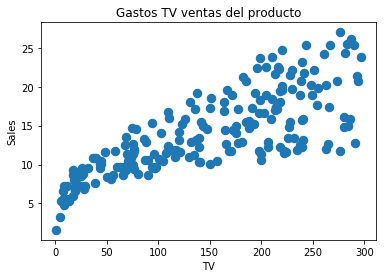

In [36]:
data_adc.plot(kind ='scatter',x='TV',y='Sales', lw=5)
plt.title('Gastos TV ventas del producto')

In [38]:
Matrix_correlacion = data_adc.corr()

In [40]:
Matrix_correlacion

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


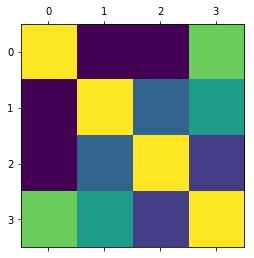

In [42]:
plt.matshow(Matrix_correlacion)
plt.savefig('Matriz-correlacion.jpg')